## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef

from collections import Counter
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, accuracy_score, f1_score

import warnings
warnings.filterwarnings("ignore")


## Exploratory data analysis

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Here we will observe the distribution of our classes

In [6]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print("Normal Share%:-",normal_share,"  ","Fraud Share%:-",fraud_share)


Normal Share%:- 99.82725143693798    Fraud Share%:- 0.1727485630620034


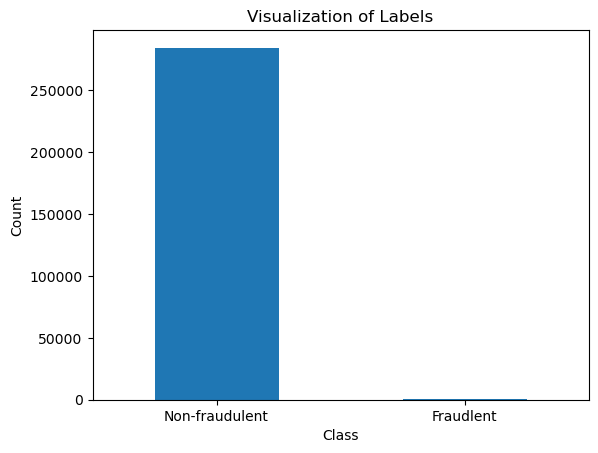

In [7]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
labels = ["Non-fraudulent", "Fraudlent"]
count_classes = df.value_counts(df['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

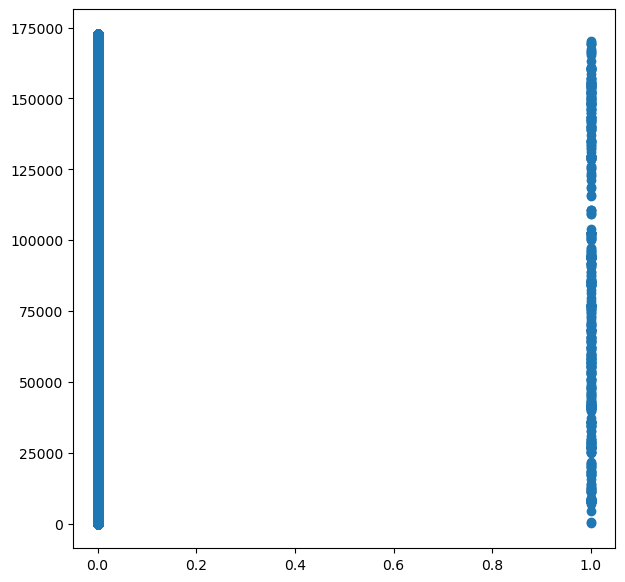

In [8]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize=[7,7])
plt.scatter(df.Class, df.Time)
plt.show()

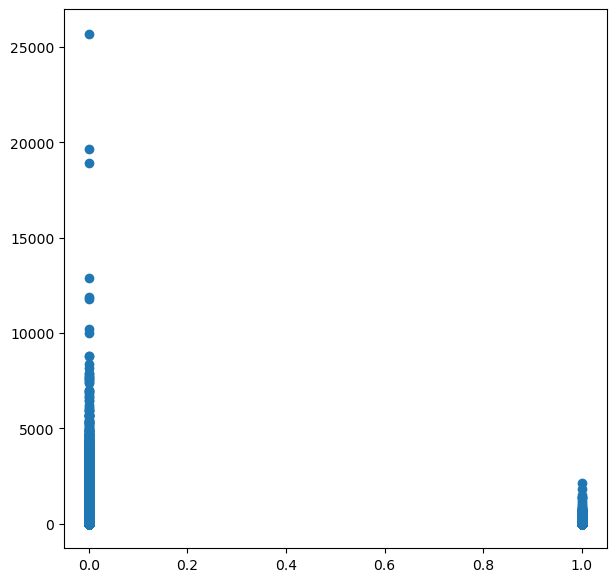

In [9]:
# Create a scatter plot to observe the distribution of classes with Amount

plt.figure(figsize=[7,7])
plt.scatter(df.Class, df.Amount)
plt.show()


In [10]:
df_fraud=df[df["Class"]==1]
df_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [11]:
df_fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


### Splitting the data into train & test data

In [12]:
feature_names = df.iloc[:, 1:30].columns
target = df.iloc[:1, 30: ].columns
print(feature_names)
print(target)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Index(['Class'], dtype='object')


In [13]:
data_features = df[feature_names]
data_target = df[target]

In [14]:
 #class variable
y=data_target
X=data_features

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [16]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

Class    492
dtype: int64
Class    350
dtype: int64
Class    142
dtype: int64


### Plotting the distribution of a variable

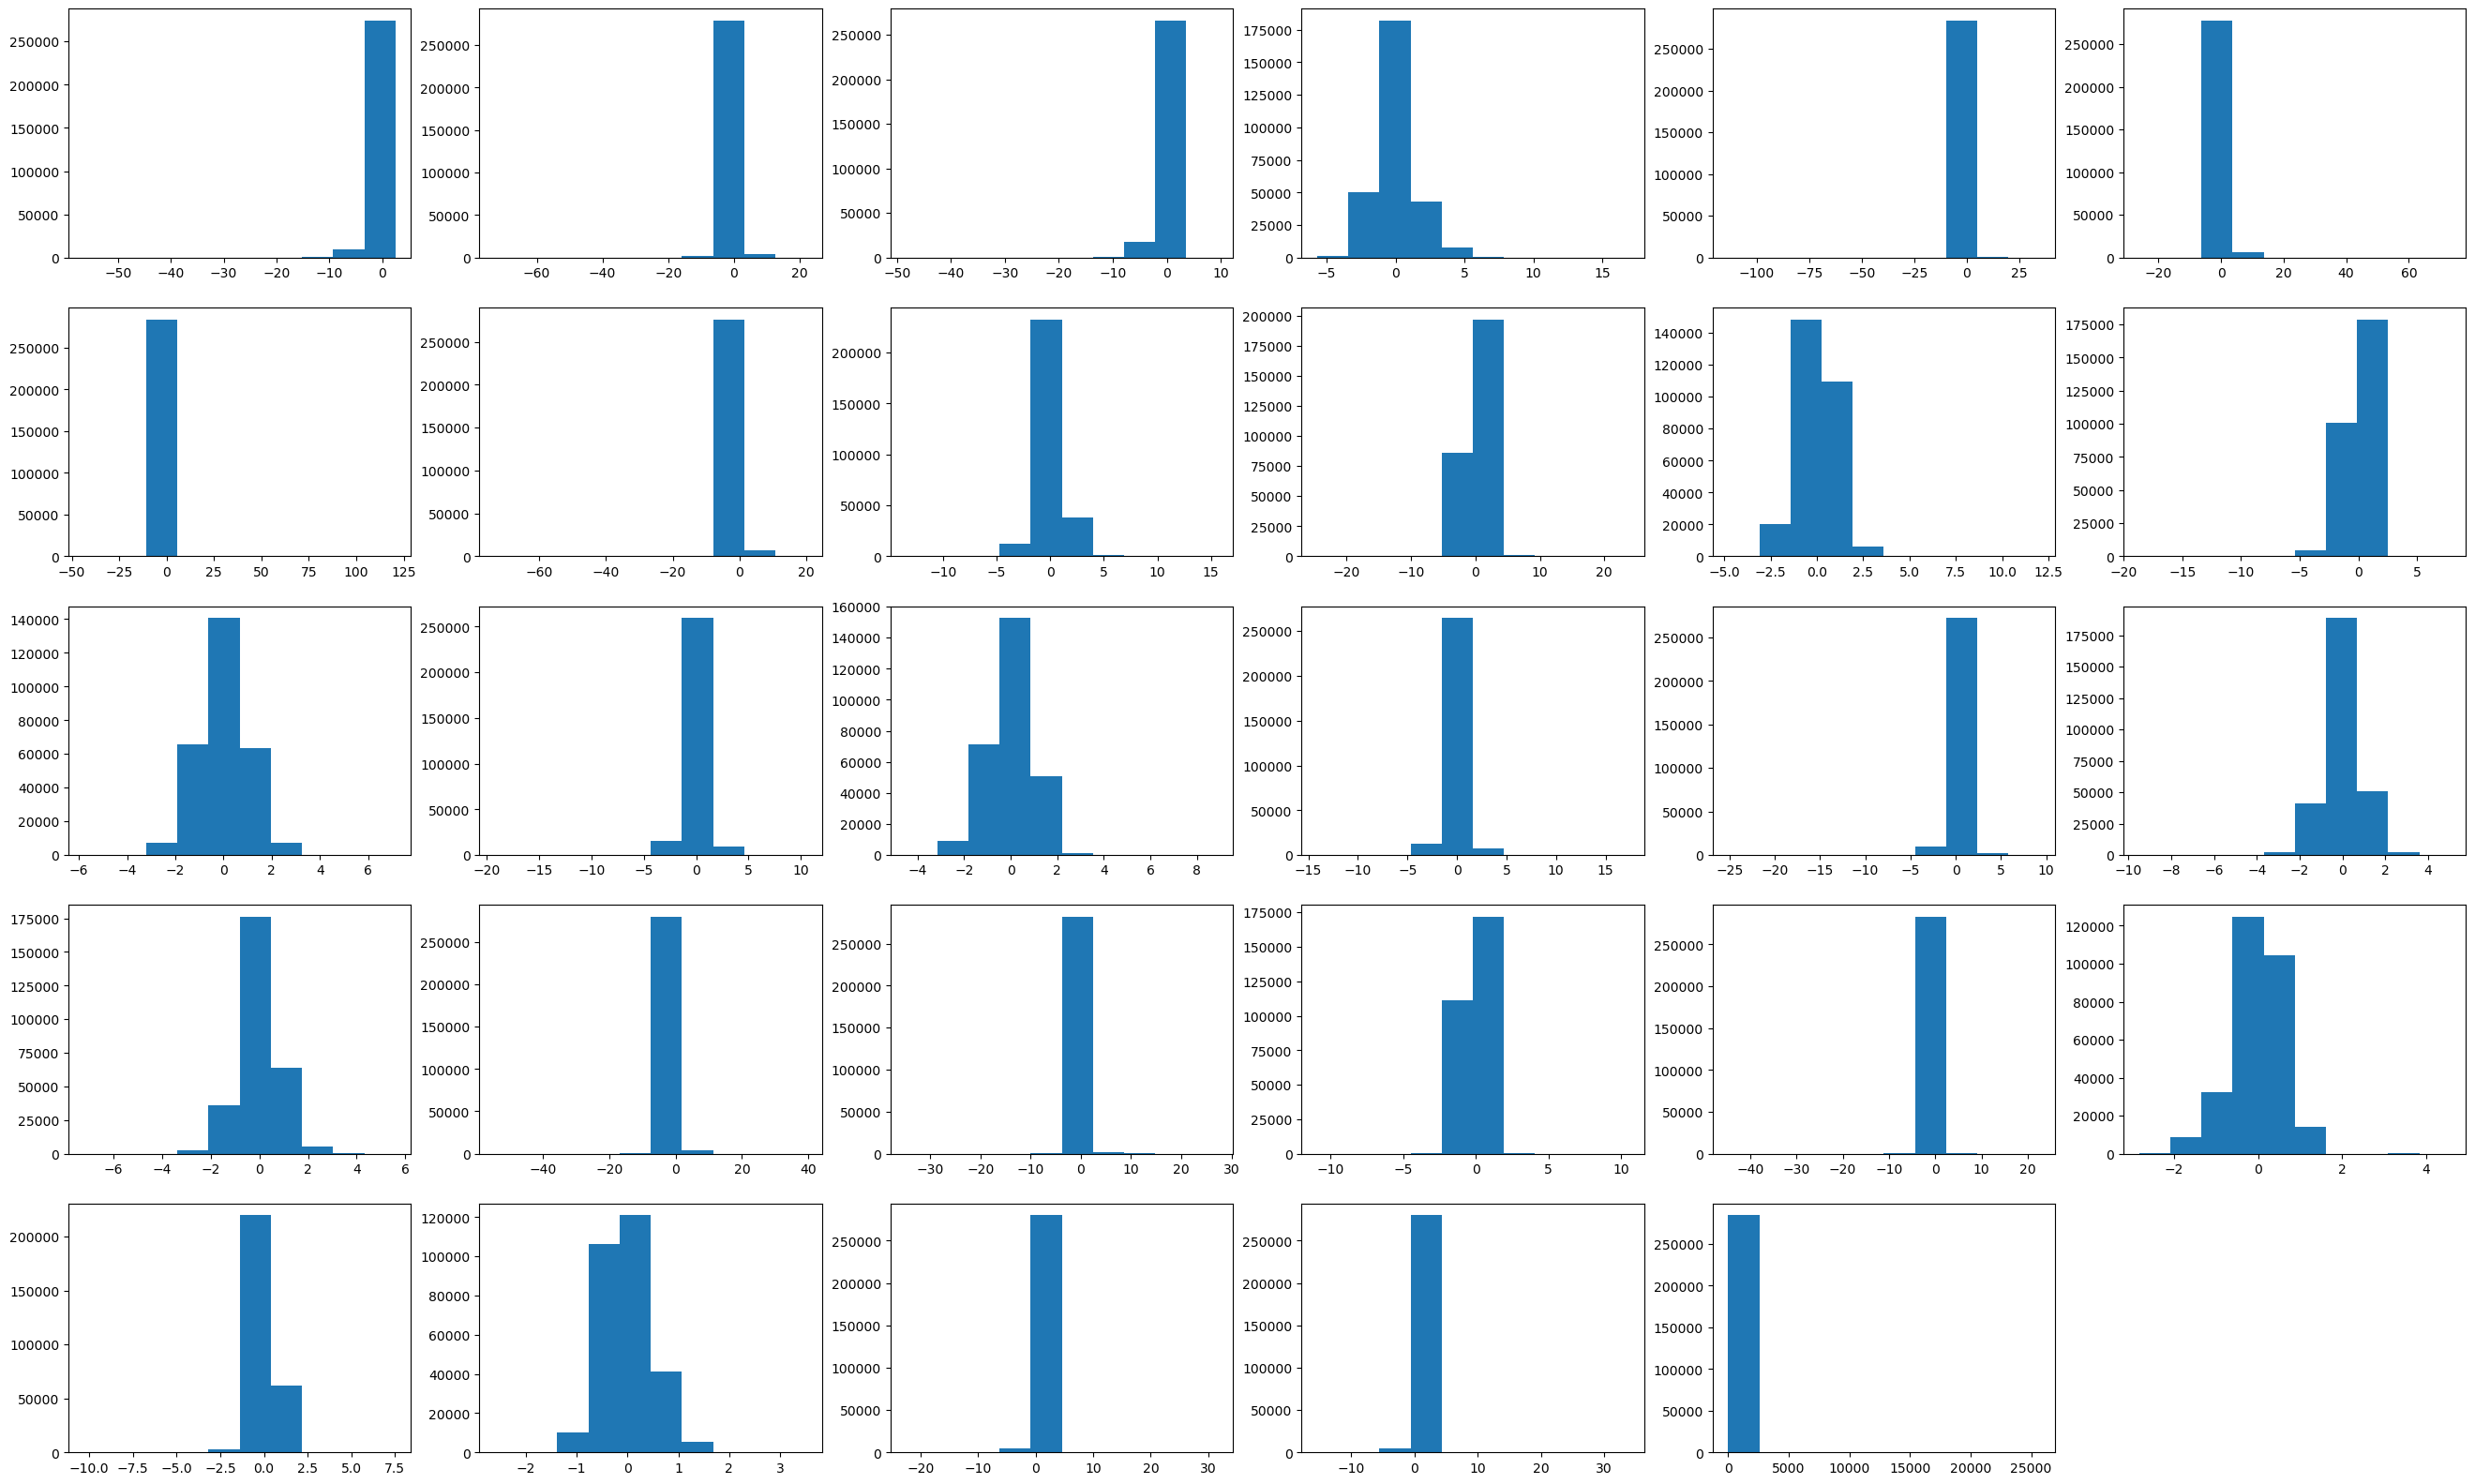

In [17]:
# plot the histogram of a variable from the dataset to see the skewness
fig = plt.figure(figsize = (33, 20))

plt.subplot(5, 6, 1) ; plt.hist(df.V1) ; plt.subplot(5, 6, 15) ; plt.hist(df.V15)
plt.subplot(5, 6, 2) ; plt.hist(df.V2) ; plt.subplot(5, 6, 16) ; plt.hist(df.V16)
plt.subplot(5, 6, 3) ; plt.hist(df.V3) ; plt.subplot(5, 6, 17) ; plt.hist(df.V17)
plt.subplot(5, 6, 4) ; plt.hist(df.V4) ; plt.subplot(5, 6, 18) ; plt.hist(df.V18)
plt.subplot(5, 6, 5) ; plt.hist(df.V5) ; plt.subplot(5, 6, 19) ; plt.hist(df.V19)
plt.subplot(5, 6, 6) ; plt.hist(df.V6) ; plt.subplot(5, 6, 20) ; plt.hist(df.V20)
plt.subplot(5, 6, 7) ; plt.hist(df.V7) ; plt.subplot(5, 6, 21) ; plt.hist(df.V21)
plt.subplot(5, 6, 8) ; plt.hist(df.V8) ; plt.subplot(5, 6, 22) ; plt.hist(df.V22)
plt.subplot(5, 6, 9) ; plt.hist(df.V9) ; plt.subplot(5, 6, 23) ; plt.hist(df.V23)
plt.subplot(5, 6, 10) ; plt.hist(df.V10) ; plt.subplot(5, 6, 24) ; plt.hist(df.V24)
plt.subplot(5, 6, 11) ; plt.hist(df.V11) ; plt.subplot(5, 6, 25) ; plt.hist(df.V25)
plt.subplot(5, 6, 12) ; plt.hist(df.V12) ; plt.subplot(5, 6, 26) ; plt.hist(df.V26)
plt.subplot(5, 6, 13) ; plt.hist(df.V13) ; plt.subplot(5, 6, 27) ; plt.hist(df.V27)
plt.subplot(5, 6, 14) ; plt.hist(df.V14) ; plt.subplot(5, 6, 28) ; plt.hist(df.V28)
plt.subplot(5, 6, 29) ; plt.hist(df.Amount)
plt.show()

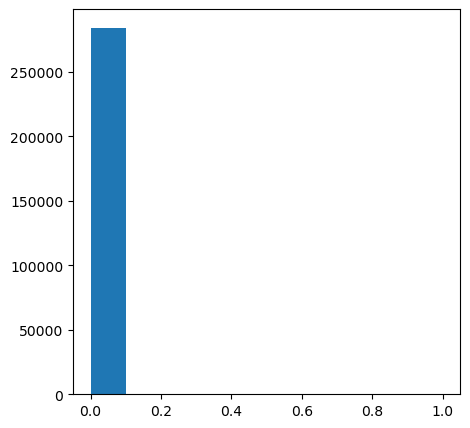

In [18]:
fig = plt.figure(figsize = (5, 5))
plt.hist(df.Class)
plt.show()

In [19]:
df_copy=df

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [20]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
data_features_pt = pt.fit_transform(data_features)

data_features_pt

array([[-0.9048152 , -0.13150276,  2.17607386, ...,  0.32302651,
        -0.05333224,  1.11901341],
       [ 0.62638966,  0.09306734, -0.03506242, ..., -0.03579296,
         0.05749143, -1.12846424],
       [-0.90424231, -0.87185802,  1.38129728, ..., -0.15141697,
        -0.17375212,  1.62328624],
       ...,
       [ 1.30917055, -0.27480125, -1.85834088, ..., -0.00218307,
        -0.07043663,  0.67558998],
       [-0.39584388,  0.27752167,  0.39117209, ...,  0.26040007,
         0.33358146, -0.42729814],
       [-0.54534012, -0.20558579,  0.39187039, ..., -0.01937189,
         0.05416788,  1.32320001]])

In [21]:
data_features1 = pd.DataFrame(data_features_pt, columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])
data_features1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.904815,-0.131503,2.176074,0.983588,-0.256110,0.459227,0.193516,0.020305,0.380443,0.127074,...,0.323559,-0.007670,0.366644,-0.189647,0.015102,0.211929,-0.323884,0.323027,-0.053332,1.119013
1,0.626390,0.093067,-0.035062,0.387928,0.031947,0.045846,-0.063874,0.006711,-0.184488,-0.115195,...,-0.093203,-0.298760,-0.884170,0.153342,-0.637483,0.288440,0.353130,-0.035793,0.057491,-1.128464
2,-0.904242,-0.871858,1.381297,0.341811,-0.374492,1.320901,0.639714,0.172348,-1.453859,0.234324,...,0.680896,0.357879,1.069496,1.501808,-1.133450,-0.653607,-0.209953,-0.151417,-0.173752,1.623286
3,-0.742857,-0.202760,1.401049,-0.581136,-0.019151,0.983351,0.191907,0.309141,-1.319689,-0.008922,...,-0.273184,-0.133275,-0.013060,-0.317680,-1.756645,1.276336,-0.399896,0.144087,0.201524,1.012504
4,-0.823641,0.530197,1.160592,0.357540,-0.305614,0.187360,0.479194,-0.331706,0.769520,0.718432,...,0.528646,0.004660,1.107811,-0.232990,0.145885,-0.429239,1.053668,0.541488,0.669838,0.692981


In [22]:
y=data_target
X=data_features1

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


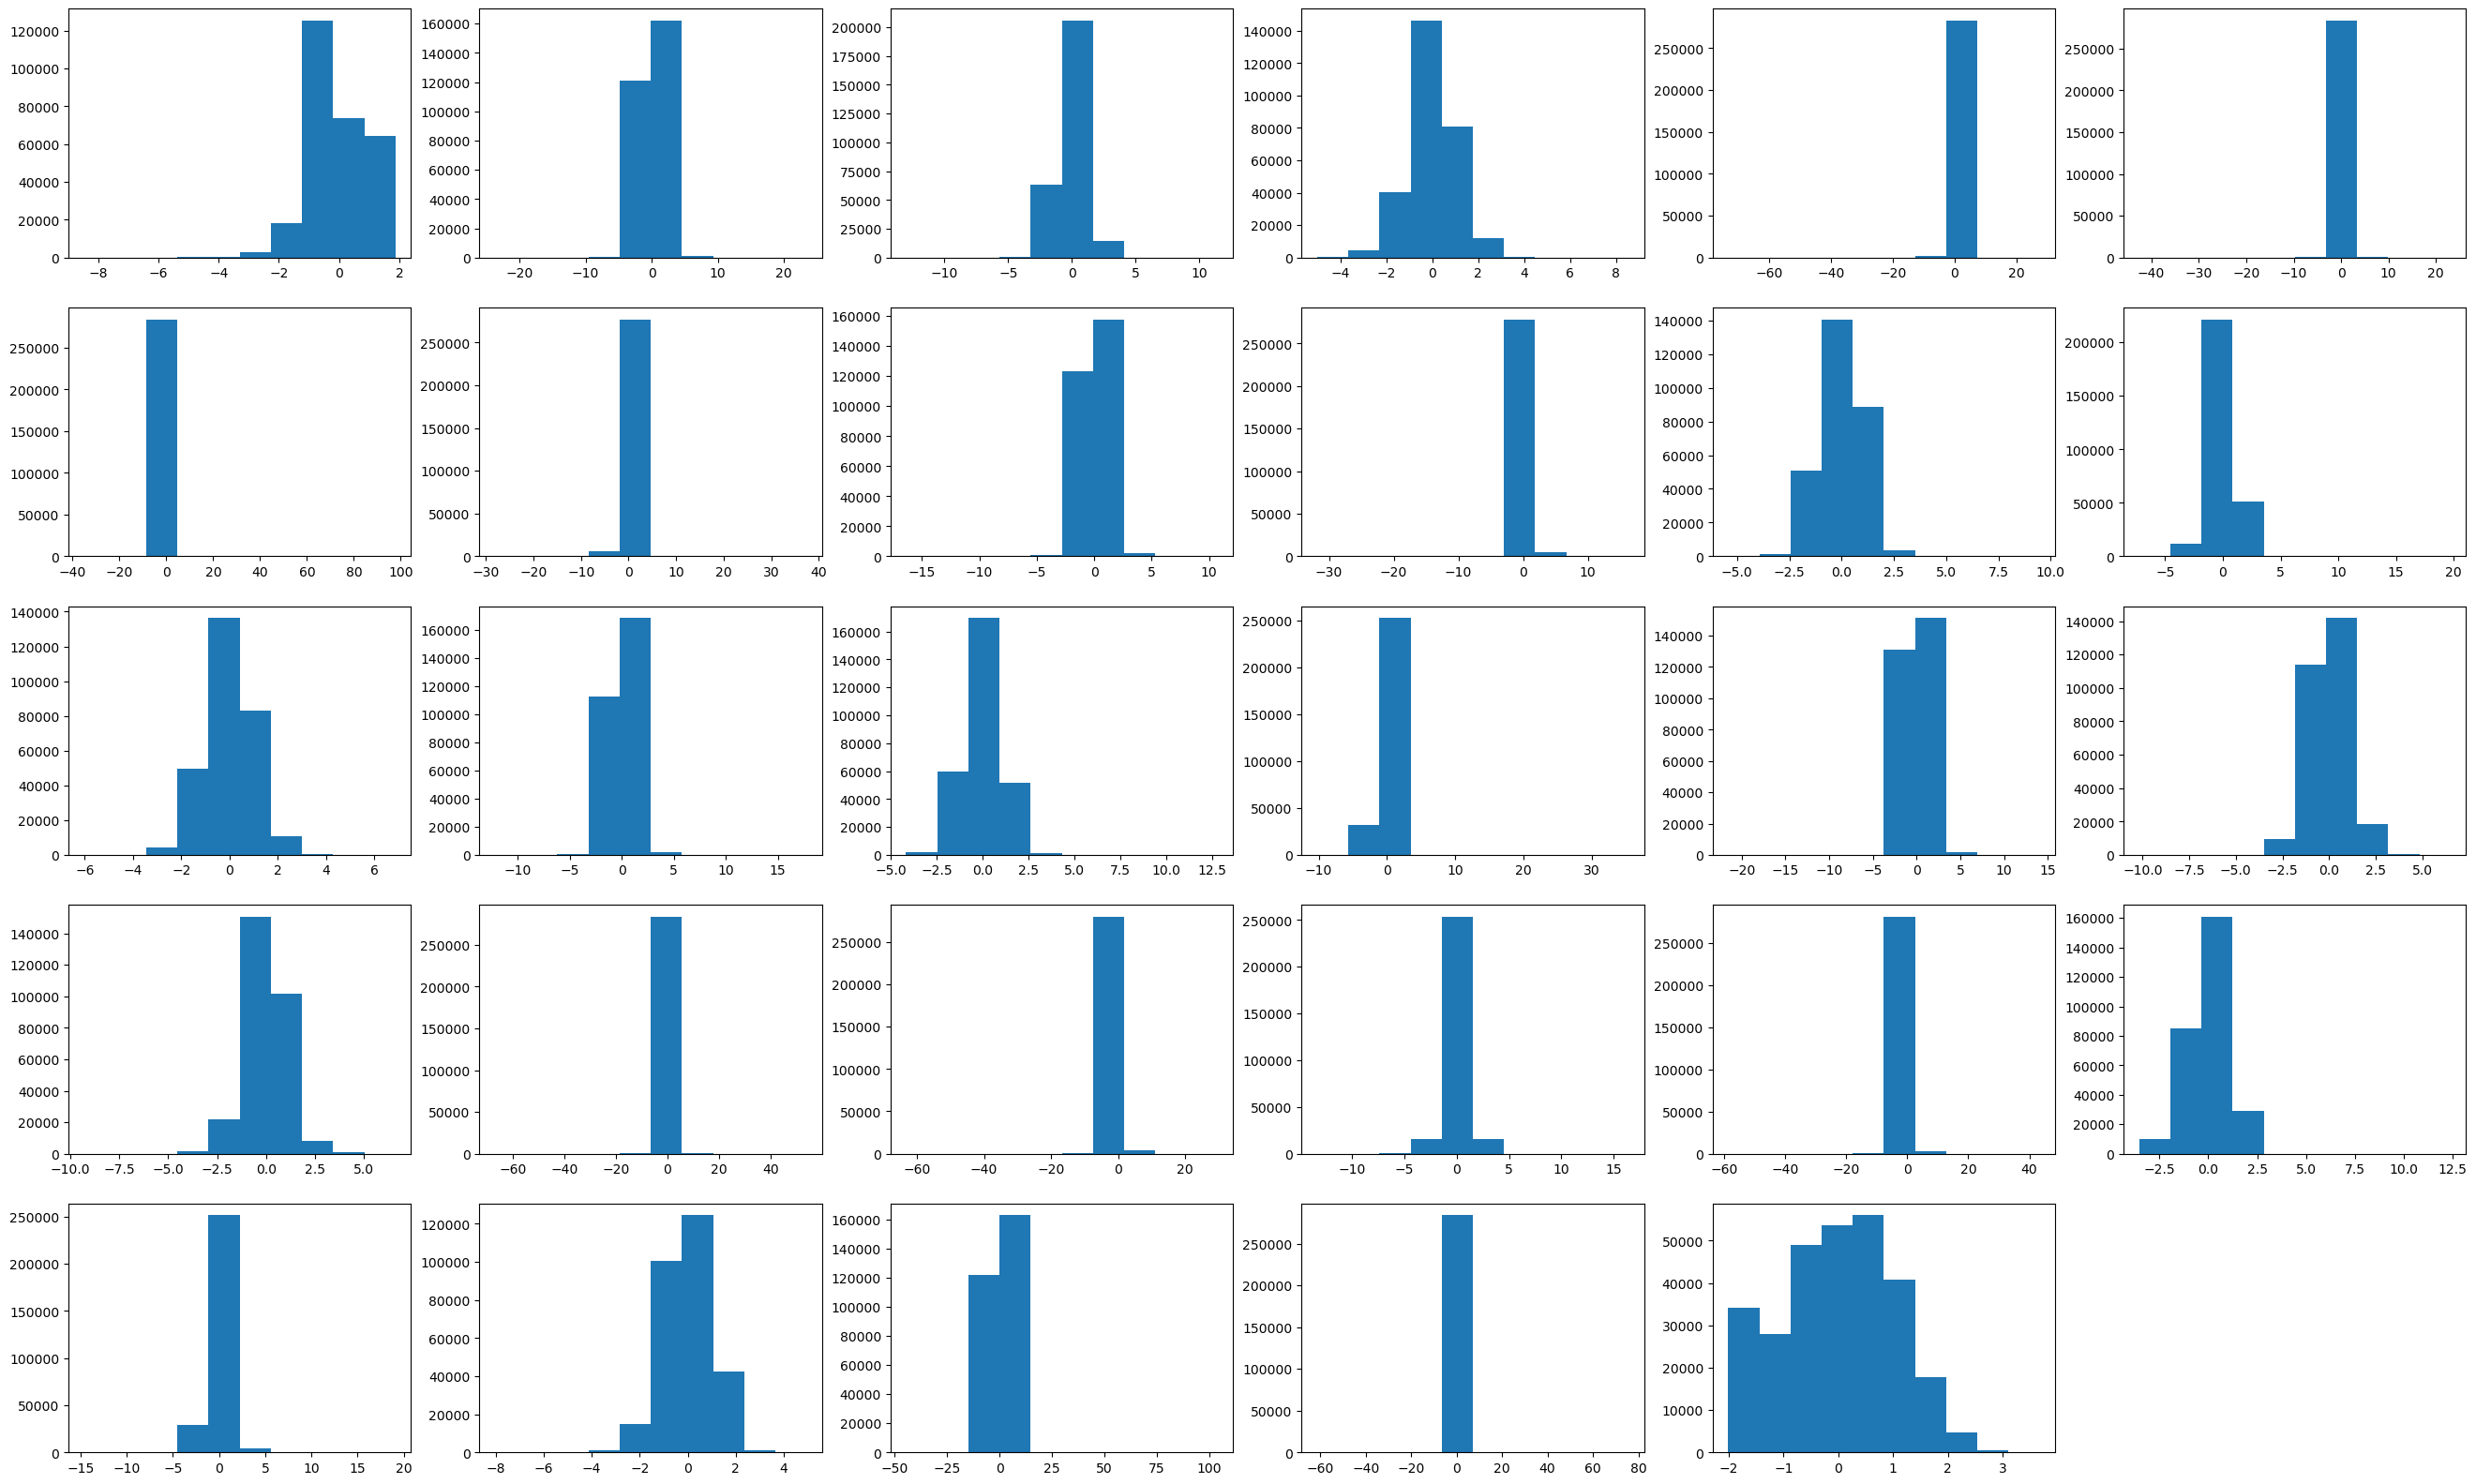

In [23]:
# plot the histogram of a variable from the dataset again to see the result 
fig = plt.figure(figsize = (33, 20))

plt.subplot(5, 6, 1) ; plt.hist(data_features1.V1) ; plt.subplot(5, 6, 15) ; plt.hist(data_features1.V15)
plt.subplot(5, 6, 2) ; plt.hist(data_features1.V2) ; plt.subplot(5, 6, 16) ; plt.hist(data_features1.V16)
plt.subplot(5, 6, 3) ; plt.hist(data_features1.V3) ; plt.subplot(5, 6, 17) ; plt.hist(data_features1.V17)
plt.subplot(5, 6, 4) ; plt.hist(data_features1.V4) ; plt.subplot(5, 6, 18) ; plt.hist(data_features1.V18)
plt.subplot(5, 6, 5) ; plt.hist(data_features1.V5) ; plt.subplot(5, 6, 19) ; plt.hist(data_features1.V19)
plt.subplot(5, 6, 6) ; plt.hist(data_features1.V6) ; plt.subplot(5, 6, 20) ; plt.hist(data_features1.V20)
plt.subplot(5, 6, 7) ; plt.hist(data_features1.V7) ; plt.subplot(5, 6, 21) ; plt.hist(data_features1.V21)
plt.subplot(5, 6, 8) ; plt.hist(data_features1.V8) ; plt.subplot(5, 6, 22) ; plt.hist(data_features1.V22)
plt.subplot(5, 6, 9) ; plt.hist(data_features1.V9) ; plt.subplot(5, 6, 23) ; plt.hist(data_features1.V23)
plt.subplot(5, 6, 10) ; plt.hist(data_features1.V10) ; plt.subplot(5, 6, 24) ; plt.hist(data_features1.V24)
plt.subplot(5, 6, 11) ; plt.hist(data_features1.V11) ; plt.subplot(5, 6, 25) ; plt.hist(data_features1.V25)
plt.subplot(5, 6, 12) ; plt.hist(data_features1.V12) ; plt.subplot(5, 6, 26) ; plt.hist(data_features1.V26)
plt.subplot(5, 6, 13) ; plt.hist(data_features1.V13) ; plt.subplot(5, 6, 27) ; plt.hist(data_features1.V27)
plt.subplot(5, 6, 14) ; plt.hist(data_features1.V14) ; plt.subplot(5, 6, 28) ; plt.hist(data_features1.V28)
plt.subplot(5, 6, 29) ; plt.hist(data_features1.Amount)
plt.show()


## Model Building
- Build different models on the imbalanced dataset and see the result

### Logistic Regression Model Building

In [24]:
# Importing libraries for cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

#### Performing cross validation and hyperparameter tuning, evaluating result by choosing a evaluation metric and print the optimum value of hyperparameters.

In [25]:
model = LogisticRegression()
# Creating StratifiedKFold object with 7 splits
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=1)

# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)
# define search
model_cv = RandomizedSearchCV(model, space, n_iter=500, scoring='roc_auc', n_jobs=-1, cv=skf, random_state=1)
# execute search
result = model_cv.fit(X_train, y_train)
# summarize result
print('Best ROC_AUC Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


Best ROC_AUC Score: 0.9860908223185334
Best Hyperparameters: {'C': 0.01538074135003166, 'penalty': 'l2', 'solver': 'liblinear'}


#### Logistic regression with optimal C

In [26]:
num_C = 0.01538074135003166
lr = LogisticRegression(C=num_C)

In [27]:
# Fit the model on the train set
lr_model = lr.fit(X_train, y_train)

In [28]:
# Predictions on the train set
y_train_pred = lr_model.predict(X_train)

In [29]:
# Confusion matrix
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)

[[198992     22]
 [   119    231]]


In [30]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# ROC_AUC
print("ROC_AUC:-",roc_auc_score(y_train, y_train_pred))

# f1_score
print("F1 Score:-",f1_score(y_train, y_train_pred))

# Accuracy
print("Accuracy:-",accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

ROC_AUC:- 0.8299447275066076
F1 Score:- 0.7661691542288557
Accuracy:- 0.9992927509480147
Sensitivity:- 0.66
Specificity:- 0.9998894550132151


In [31]:
# Prediction on the test set
y_test_pred = lr_model.predict(X_test)

In [32]:
# Confusion matrix
confusion1 = confusion_matrix(y_test, y_test_pred)
print(confusion1)

[[85281    20]
 [   52    90]]


In [33]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

# ROC_AUC
print("ROC_AUC:-",roc_auc_score(y_test, y_test_pred))

# f1_score
print("F1 Score:-",f1_score(y_test, y_test_pred))

# Accuracy
print("Accuracy:-",accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

ROC_AUC:- 0.8167841765307972
F1 Score:- 0.7142857142857142
Accuracy:- 0.9991573329588147
Sensitivity:- 0.6338028169014085
Specificity:- 0.9997655361601857


#### For Logistic Regression ROC_AUC score for train set is 82.9% and for test set is 81.6%.

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

## Decision tree Model Building

#### Performing cross validation and hyperparameter tuning, evaluating result by choosing a evaluation metric and print the optimum value of hyperparameters.

In [34]:
model = DecisionTreeClassifier()
# Creating StratifiedKFold object with 7 splits
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=1)

param = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

# define search
model_cv = RandomizedSearchCV(model, param_distributions=param, scoring='roc_auc', cv=skf, verbose=1)
# execute search
result = model_cv.fit(X_train, y_train)
# summarize result
print('Best ROC_AUC Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


Fitting 7 folds for each of 8 candidates, totalling 56 fits
Best ROC_AUC Score: 0.9445850115028342
Best Hyperparameters: {'min_samples_split': 50, 'min_samples_leaf': 100, 'max_depth': 5}


In [35]:
# Model with optimal hyperparameters
dt_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

In [36]:
# Predictions on the train set
y_train_pred = dt_model.predict(X_train)

In [37]:
# Confusion matrix
confusion2 = confusion_matrix(y_train, y_train_pred)
print(confusion2)

[[198947     67]
 [    98    252]]


In [38]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# ROC_AUC
print("ROC_AUC:-",roc_auc_score(y_train, y_train_pred))

# f1_score
print("F1 Score:-",f1_score(y_train, y_train_pred))

# Accuracy
print("Accuracy:-",accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

ROC_AUC:- 0.8598316701337595
F1 Score:- 0.7533632286995516
Accuracy:- 0.9991723681306555
Sensitivity:- 0.72
Specificity:- 0.9996633402675189


In [39]:
# Prediction on the test set
y_test_pred = dt_model.predict(X_test)

In [40]:
# Confusion matrix
confusion3 = confusion_matrix(y_test, y_test_pred)
print(confusion3)

[[85255    46]
 [   52    90]]


In [41]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

# ROC_AUC
print("ROC_AUC:-",roc_auc_score(y_test, y_test_pred))

# f1_score
print("F1 Score:-",f1_score(y_test, y_test_pred))

# Accuracy
print("Accuracy:-",accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

ROC_AUC:- 0.8166317750349178
F1 Score:- 0.6474820143884893
Accuracy:- 0.9988530365272755
Sensitivity:- 0.6338028169014085
Specificity:- 0.9994607331684271


#### For Decision tree ROC_AUC score for train set is 85.9% and for test set is 81.6%.

## Random Forest Model Building

#### Performing cross validation and hyperparameter tuning, evaluating result by choosing a evaluation metric and print the optimum value of hyperparameters.

In [42]:
# Create a model
model = RandomForestClassifier()

# Creating StratifiedKFold object with 7 splits
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=1)

rfparam = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}

# define search
model_cv = RandomizedSearchCV(model, param_distributions=rfparam, scoring='roc_auc', cv=skf, n_jobs = -1, verbose=1, return_train_score=True)
# execute search
result = model_cv.fit(X_train, y_train)
# summarize result
print('Best ROC_AUC Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


Fitting 7 folds for each of 10 candidates, totalling 70 fits
Best ROC_AUC Score: 0.9745528856867558
Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 50, 'min_samples_leaf': 100, 'max_features': 10, 'max_depth': 5}


In [43]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=100, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=300)

In [44]:
# Fit the model
rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=100,
                       min_samples_split=50, n_estimators=300)

In [45]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train)

In [46]:
# Confusion matrix
confusion4 = confusion_matrix(y_train, y_train_pred)
print(confusion4)

[[198984     30]
 [   116    234]]


In [47]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

# ROC_AUC
print("ROC_AUC:-",roc_auc_score(y_train, y_train_pred))

# f1_score
print("F1 Score:-",f1_score(y_train, y_train_pred))

# Accuracy
print("Accuracy:-",accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

ROC_AUC:- 0.8342103427038156
F1 Score:- 0.762214983713355
Accuracy:- 0.9992676711943982
Sensitivity:- 0.6685714285714286
Specificity:- 0.9998492568362025


In [48]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test)

In [49]:
# Confusion matrix
confusion5 = confusion_matrix(y_test, y_test_pred)
print(confusion5)

[[85275    26]
 [   54    88]]


In [50]:
TP = confusion5[1,1] # true positive 
TN = confusion5[0,0] # true negatives
FP = confusion5[0,1] # false positives
FN = confusion5[1,0] # false negatives

# ROC_AUC
print("ROC_AUC:-",roc_auc_score(y_test, y_test_pred))

# f1_score
print("F1 Score:-",f1_score(y_test, y_test_pred))

# Accuracy
print("Accuracy:-",accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

ROC_AUC:- 0.8097067534336982
F1 Score:- 0.6875
Accuracy:- 0.9990637032875719
Sensitivity:- 0.6197183098591549
Specificity:- 0.9996951970082414


###### For Random Forest ROC_AUC score for train set is 83.42% and for test set is 80.97%.

## XGBoost  Model Building

#### Performing cross validation and hyperparameter tuning, evaluating result by choosing a evaluation metric and print the optimum value of hyperparameters.

In [51]:
#Importing Liberaries
!pip install xgboost
from xgboost import XGBClassifier


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
model = XGBClassifier()

# Creating StratifiedKFold object with 7 splits
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=1)

xgparams = {
 'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
 'max_depth' : [ 3, 7, 9, 11, 13, 15],
 'max_leaves': range(50, 150, 50),
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'gamma': [ 0.0, 0.2, 0.4, 0.6, 0.8, 1 ],
 'n_estimators': [100,200,300],   
 'colsample_bytree' : [ 0.1, 0.3, 0.5 , 0.7 ]
}


model_cv=RandomizedSearchCV(model, param_distributions=xgparams, scoring='roc_auc', cv=skf, n_jobs = -1, verbose=1)

# execute search
result = model_cv.fit(X_train, y_train)
# summarize result
print('Best ROC_AUC Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_estimator_)


Fitting 7 folds for each of 10 candidates, totalling 70 fits
Best ROC_AUC Score: 0.9834970665025423
Best Hyperparameters: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=50,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [53]:
xg_model=XGBClassifier(colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=15, max_leaves=50,
              min_child_weight=7, n_estimators=100, n_jobs=None, random_state=None)

In [54]:
# Fit the model
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=50,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [55]:
# Predictions on the train set
y_train_pred = xg_model.predict(X_train)

In [56]:
# Confusion matrix
confusion6 = confusion_matrix(y_train, y_train_pred)
print(confusion6)

[[199005      9]
 [    53    297]]


In [57]:
TP = confusion6[1,1] # true positive 
TN = confusion6[0,0] # true negatives
FP = confusion6[0,1] # false positives
FN = confusion6[1,0] # false negatives

# ROC_AUC
print("ROC_AUC:-",roc_auc_score(y_train, y_train_pred))

# f1_score
print("F1 Score:-",f1_score(y_train, y_train_pred))

# Accuracy
print("Accuracy:-",accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

ROC_AUC:- 0.9242631028111447
F1 Score:- 0.9054878048780488
Accuracy:- 0.9996890110551554
Sensitivity:- 0.8485714285714285
Specificity:- 0.9999547770508608


In [58]:
# Prediction on the test set
y_test_pred = xg_model.predict(X_test)

In [59]:
# Confusion matrix
confusion7 = confusion_matrix(y_test, y_test_pred)
print(confusion7)

[[85284    17]
 [   38   104]]


In [60]:
TP = confusion7[1,1] # true positive 
TN = confusion7[0,0] # true negatives
FP = confusion7[0,1] # false positives
FN = confusion7[1,0] # false negatives

# ROC_AUC
print("ROC_AUC:-",roc_auc_score(y_test, y_test_pred))

# f1_score
print("F1 Score:-",f1_score(y_test, y_test_pred))

# Accuracy
print("Accuracy:-",accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

ROC_AUC:- 0.8660975359666704
F1 Score:- 0.7908745247148289
Accuracy:- 0.9993562960102056
Sensitivity:- 0.7323943661971831
Specificity:- 0.9998007057361579


#### For XGBoost ROC_AUC score for train set is 92.42% and for test set is 86.96%.

#### Preferred Metric for this imbalanced data is ROC_AUC Score.

#### Note :- Out of 4 Models XGBoost performs well on imbalanced data set, for balancing techniques we will proceed with Logistic regression, Decision trees, XGBoost Models because Random Forest have poor results than other models and it also requires lots of computational time.

In [61]:
clf = XGBClassifier(colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=15, max_leaves=50,
              min_child_weight=7, n_estimators=100, n_jobs=None, random_state=None)
clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)

# ROC_AUC
print("ROC_AUC:-",roc_auc_score(y_test, y_test_pred))


ROC_AUC:- 0.9242631028111447
F1 Score:- 0.9054878048780488
Accuracy:- 0.9996890110551554


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 10
3rd Top var = 12


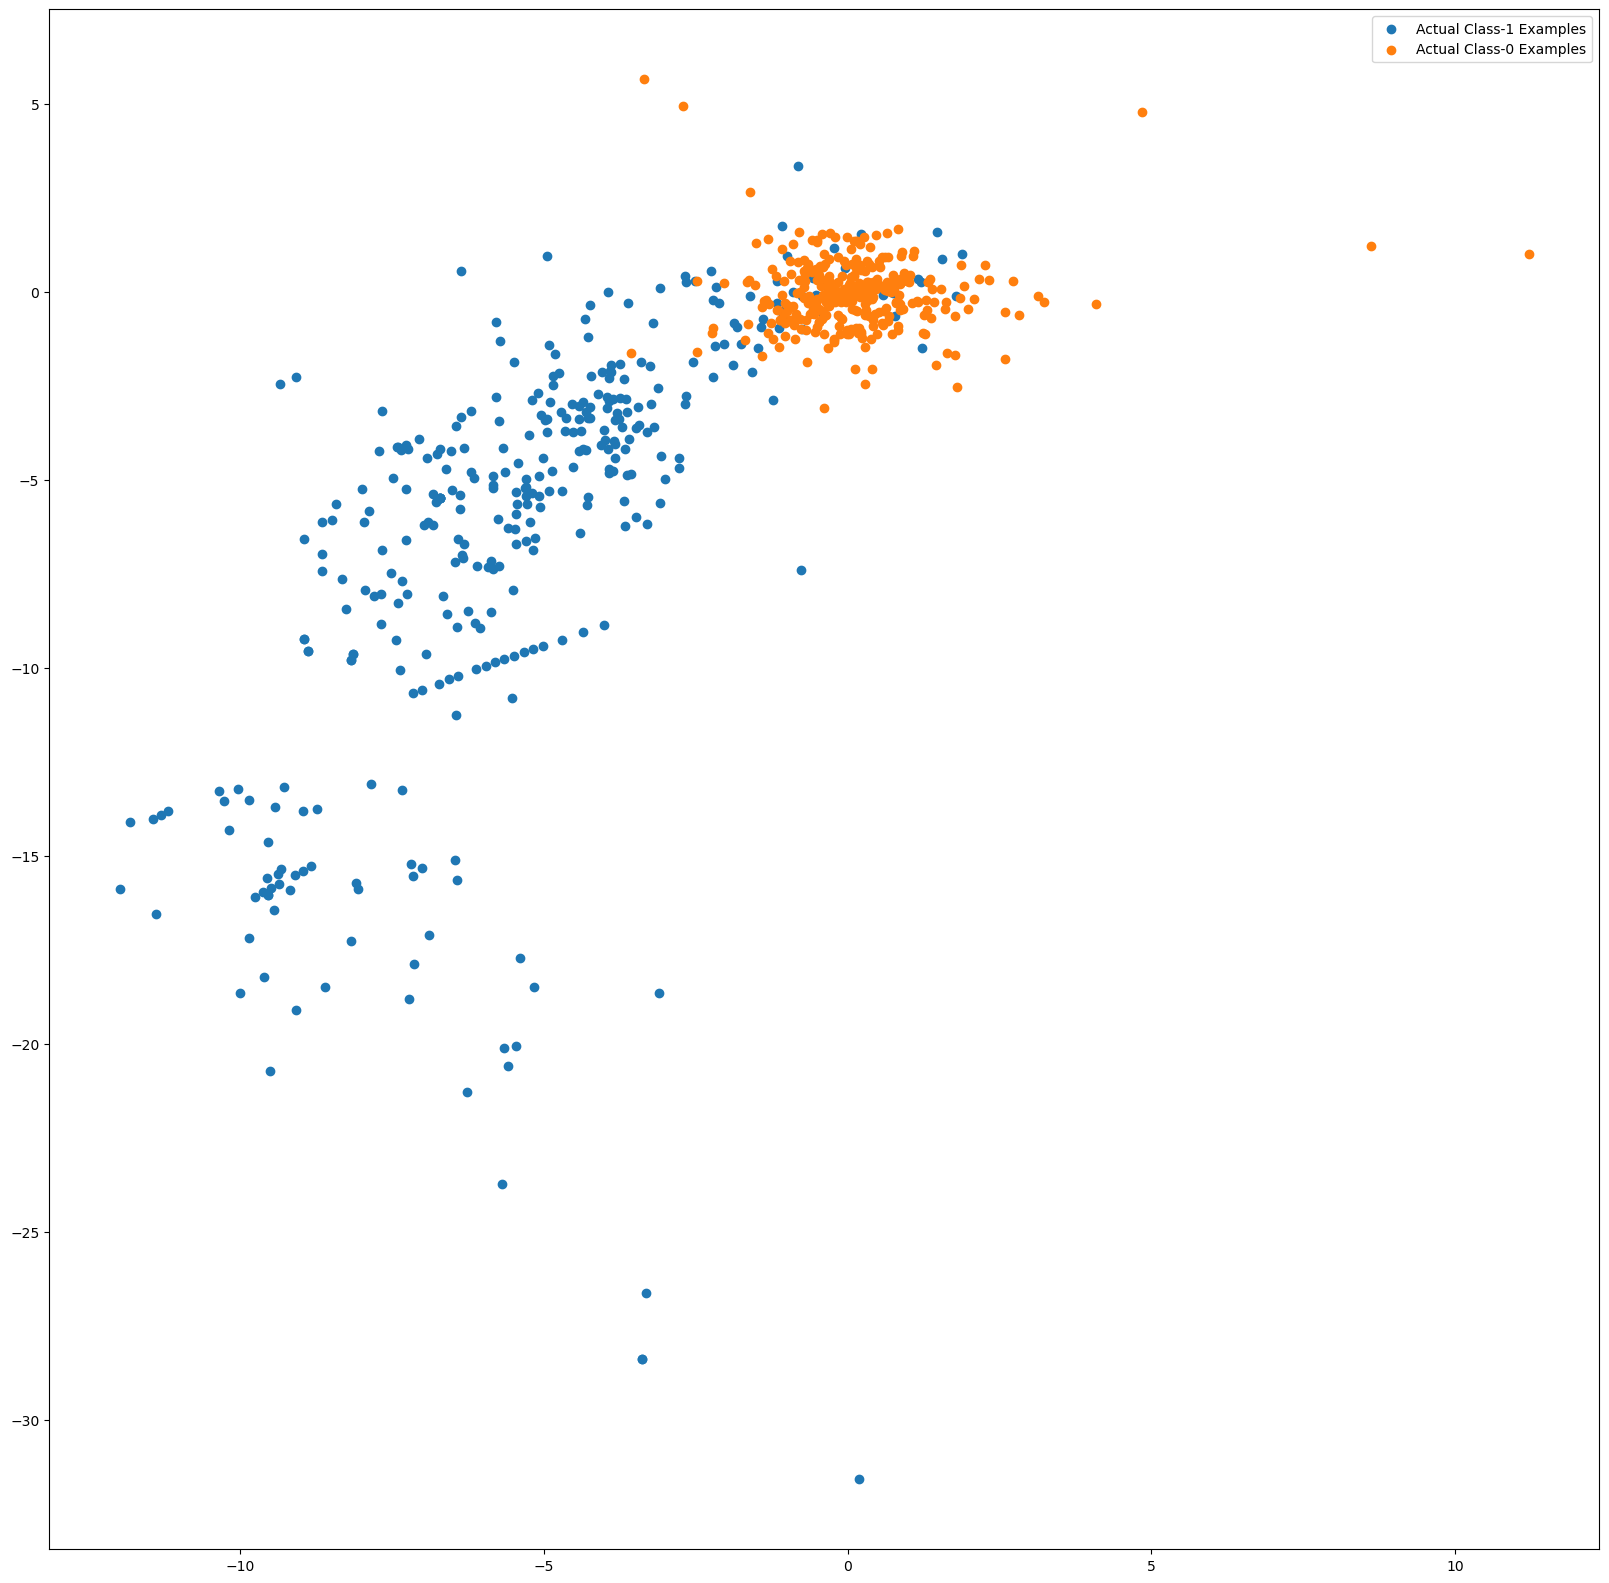

In [88]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

train_dt=pd.concat([X_train, y_train], axis=1)
train_dt.head()

#X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
#X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

X_train_1 = train_dt[train_dt['Class']==1]
X_train_0 = train_dt[train_dt['Class']==0]

#np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(X_train_1.iloc[:, top_var_index], X_train_1.iloc[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0.iloc[:X_train_1.shape[0], top_var_index], X_train_0.iloc[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building after Balancing Dataset using different techniques
- Build different models on the balanced dataset and see the result

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Similarly explore other algorithms on balanced dataset by building models like:
- Logistic Regression
- Decision Tree
- XGBoost

### Random Oversampling

In [89]:
from imblearn.over_sampling import RandomOverSampler
over_sample = RandomOverSampler(sampling_strategy = 1)
X_resampled_os, y_resampled_os = over_sample.fit_resample(X_train, y_train)


### Logistic Regression Model building

In [90]:
model = LogisticRegression()
# Creating StratifiedKFold object with 7 splits
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=1)

# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)
# define search
model_cv = RandomizedSearchCV(model, space, n_iter=500, scoring='roc_auc', n_jobs=-1, cv=skf, random_state=1)
# execute search
result = model_cv.fit(X_resampled_os, y_resampled_os)
# summarize result
print('Best ROC_AUC Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


Best ROC_AUC Score: 0.9899350530243173
Best Hyperparameters: {'C': 0.04250882813054309, 'penalty': 'l2', 'solver': 'liblinear'}


In [91]:
num_C= 0.04250882813054309
lr_os = LogisticRegression(C=num_C)

# Fit the model on the train set
lr_os_model = lr_os.fit(X_resampled_os, y_resampled_os)

In [92]:
# Predictions on the train set
y_train_pred_os = lr_os_model.predict(X_resampled_os)

# Confusion matrix
confusion8 = confusion_matrix(y_resampled_os, y_train_pred_os)
print(confusion8)

TP = confusion8[1,1] # true positive 
TN = confusion8[0,0] # true negatives
FP = confusion8[0,1] # false positives
FN = confusion8[1,0] # false negatives

# ROC_AUC
print("ROC_AUC:-",roc_auc_score(y_resampled_os, y_train_pred_os))

# f1_score
print("F1 Score:-",f1_score(y_resampled_os, y_train_pred_os))

# Accuracy
print("Accuracy:-",accuracy_score(y_resampled_os, y_train_pred_os))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


[[194396   4618]
 [ 14670 184344]]
ROC_AUC:- 0.9515410976112233
F1 Score:- 0.9502855846753409
Accuracy:- 0.9515410976112233
Sensitivity:- 0.9262865929030119
Specificity:- 0.9767956023194349


In [93]:
# Prediction on the test set
y_test_pred = lr_os_model.predict(X_test)


In [94]:
# Confusion matrix
confusion9 = confusion_matrix(y_test, y_test_pred)
print(confusion9)


[[83238  2063]
 [   15   127]]


In [95]:
TP = confusion9[1,1] # true positive 
TN = confusion9[0,0] # true negatives
FP = confusion9[0,1] # false positives
FN = confusion9[1,0] # false negatives

# ROC_AUC
print("ROC_AUC:-",roc_auc_score(y_test, y_test_pred))

# f1_score
print("F1 Score:-",f1_score(y_test, y_test_pred))

# Accuracy
print("Accuracy:-",accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


ROC_AUC:- 0.9350906260531264
F1 Score:- 0.10891938250428816
Accuracy:- 0.9756796928946784
Sensitivity:- 0.8943661971830986
Specificity:- 0.9758150549231545


### Decision Tree Model building

In [96]:
model = DecisionTreeClassifier()
# Creating StratifiedKFold object with 7 splits
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=1)

param = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

# define search
model_cv = RandomizedSearchCV(model, param_distributions=param, scoring='roc_auc', cv=skf, verbose=1)
# execute search
result = model_cv.fit(X_resampled_os, y_resampled_os)
# summarize result
print('Best ROC_AUC Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


Fitting 7 folds for each of 8 candidates, totalling 56 fits
Best ROC_AUC Score: 0.9995682650998764
Best Hyperparameters: {'min_samples_split': 100, 'min_samples_leaf': 100, 'max_depth': 10}


In [97]:
# Model with optimal hyperparameters
dt_os_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)


In [98]:
dt_os_model.fit(X_resampled_os, y_resampled_os)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

In [99]:
# Predictions on the train set
y_train_pred_os = dt_os_model.predict(X_resampled_os)


In [100]:
# Confusion matrix
confusion10 = confusion_matrix(y_resampled_os, y_train_pred_os)
print(confusion10)


[[196964   2050]
 [     0 199014]]


In [101]:
TP = confusion10[1,1] # true positive 
TN = confusion10[0,0] # true negatives
FP = confusion10[0,1] # false positives
FN = confusion10[1,0] # false negatives

# ROC_AUC
print("ROC_AUC:-",roc_auc_score(y_resampled_os, y_train_pred_os))

# f1_score
print("F1 Score:-",f1_score(y_resampled_os, y_train_pred_os))

# Accuracy
print("Accuracy:-",accuracy_score(y_resampled_os, y_train_pred_os))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


ROC_AUC:- 0.9948496085702514
F1 Score:- 0.9948759991801599
Accuracy:- 0.9948496085702513
Sensitivity:- 1.0
Specificity:- 0.9896992171405027


In [102]:
# Prediction on the test set
y_test_pred = dt_os_model.predict(X_test)


In [103]:
# Confusion matrix
confusion11 = confusion_matrix(y_test, y_test_pred)
print(confusion11)


TP = confusion11[1,1] # true positive 
TN = confusion11[0,0] # true negatives
FP = confusion11[0,1] # false positives
FN = confusion11[1,0] # false negatives

# ROC_AUC
print("ROC_AUC:-",roc_auc_score(y_test, y_test_pred))

# f1_score
print("F1 Score:-",f1_score(y_test, y_test_pred))

# Accuracy
print("Accuracy:-",accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


[[84350   951]
 [   26   116]]
ROC_AUC:- 0.902876326433767
F1 Score:- 0.19189412737799835
Accuracy:- 0.988565476399471
Sensitivity:- 0.8169014084507042
Specificity:- 0.9888512444168298


### XGBoost Model Building

In [104]:
model = XGBClassifier()

# Creating StratifiedKFold object with 7 splits
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=1)

xgparams = {
 'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
 'max_depth' : [ 3, 7, 9, 11, 13, 15],
 'max_leaves': range(50, 150, 50),
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'gamma': [ 0.0, 0.2, 0.4, 0.6, 0.8, 1 ],
 'n_estimators': [100,200,300],   
 'colsample_bytree' : [ 0.1, 0.3, 0.5 , 0.7 ]
}


model_cv=RandomizedSearchCV(model, param_distributions=xgparams, scoring='roc_auc', cv=skf, n_jobs = -1, verbose=1)

# execute search
result = model_cv.fit(X_resampled_os, y_resampled_os)
# summarize result
print('Best ROC_AUC Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_estimator_)


Fitting 7 folds for each of 10 candidates, totalling 70 fits
Best ROC_AUC Score: 0.999989653950818
Best Hyperparameters: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=50,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [105]:
xg_os_model=XGBClassifier(colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=9, max_leaves=50,
              min_child_weight=5, n_estimators=300, n_jobs=None, random_state=None)


In [106]:
xg_os_model.fit(X_resampled_os, y_resampled_os)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=50,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [107]:
# Predictions on the train set
y_train_pred_os = xg_os_model.predict(X_resampled_os)


In [108]:
# Confusion matrix
confusion12 = confusion_matrix(y_resampled_os, y_train_pred_os)
print(confusion12)

TP = confusion12[1,1] # true positive 
TN = confusion12[0,0] # true negatives
FP = confusion12[0,1] # false positives
FN = confusion12[1,0] # false negatives

# ROC_AUC
print("ROC_AUC:-",roc_auc_score(y_resampled_os, y_train_pred_os))

# f1_score
print("F1 Score:-",f1_score(y_resampled_os, y_train_pred_os))

# Accuracy
print("Accuracy:-",accuracy_score(y_resampled_os, y_train_pred_os))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


[[199012      2]
 [     0 199014]]
ROC_AUC:- 0.9999949752278734
F1 Score:- 0.9999949752531216
Accuracy:- 0.9999949752278734
Sensitivity:- 1.0
Specificity:- 0.9999899504557468


In [109]:
# Prediction on the test set
y_test_pred = xg_os_model.predict(X_test)


In [110]:
# Confusion matrix
confusion13 = confusion_matrix(y_test, y_test_pred)
print(confusion13)

TP = confusion13[1,1] # true positive 
TN = confusion13[0,0] # true negatives
FP = confusion13[0,1] # false positives
FN = confusion13[1,0] # false negatives

# ROC_AUC
print("ROC_AUC:-",roc_auc_score(y_test, y_test_pred))

# f1_score
print("F1 Score:-",f1_score(y_test, y_test_pred))

# Accuracy
print("Accuracy:-",accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


[[85280    21]
 [   28   114]]
ROC_AUC:- 0.9012853571883228
F1 Score:- 0.8231046931407944
Accuracy:- 0.9994265182636377
Sensitivity:- 0.8028169014084507
Specificity:- 0.999753812968195


## SMOTE

In [112]:
# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=None, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)


### Print the class distribution after applying SMOTE 

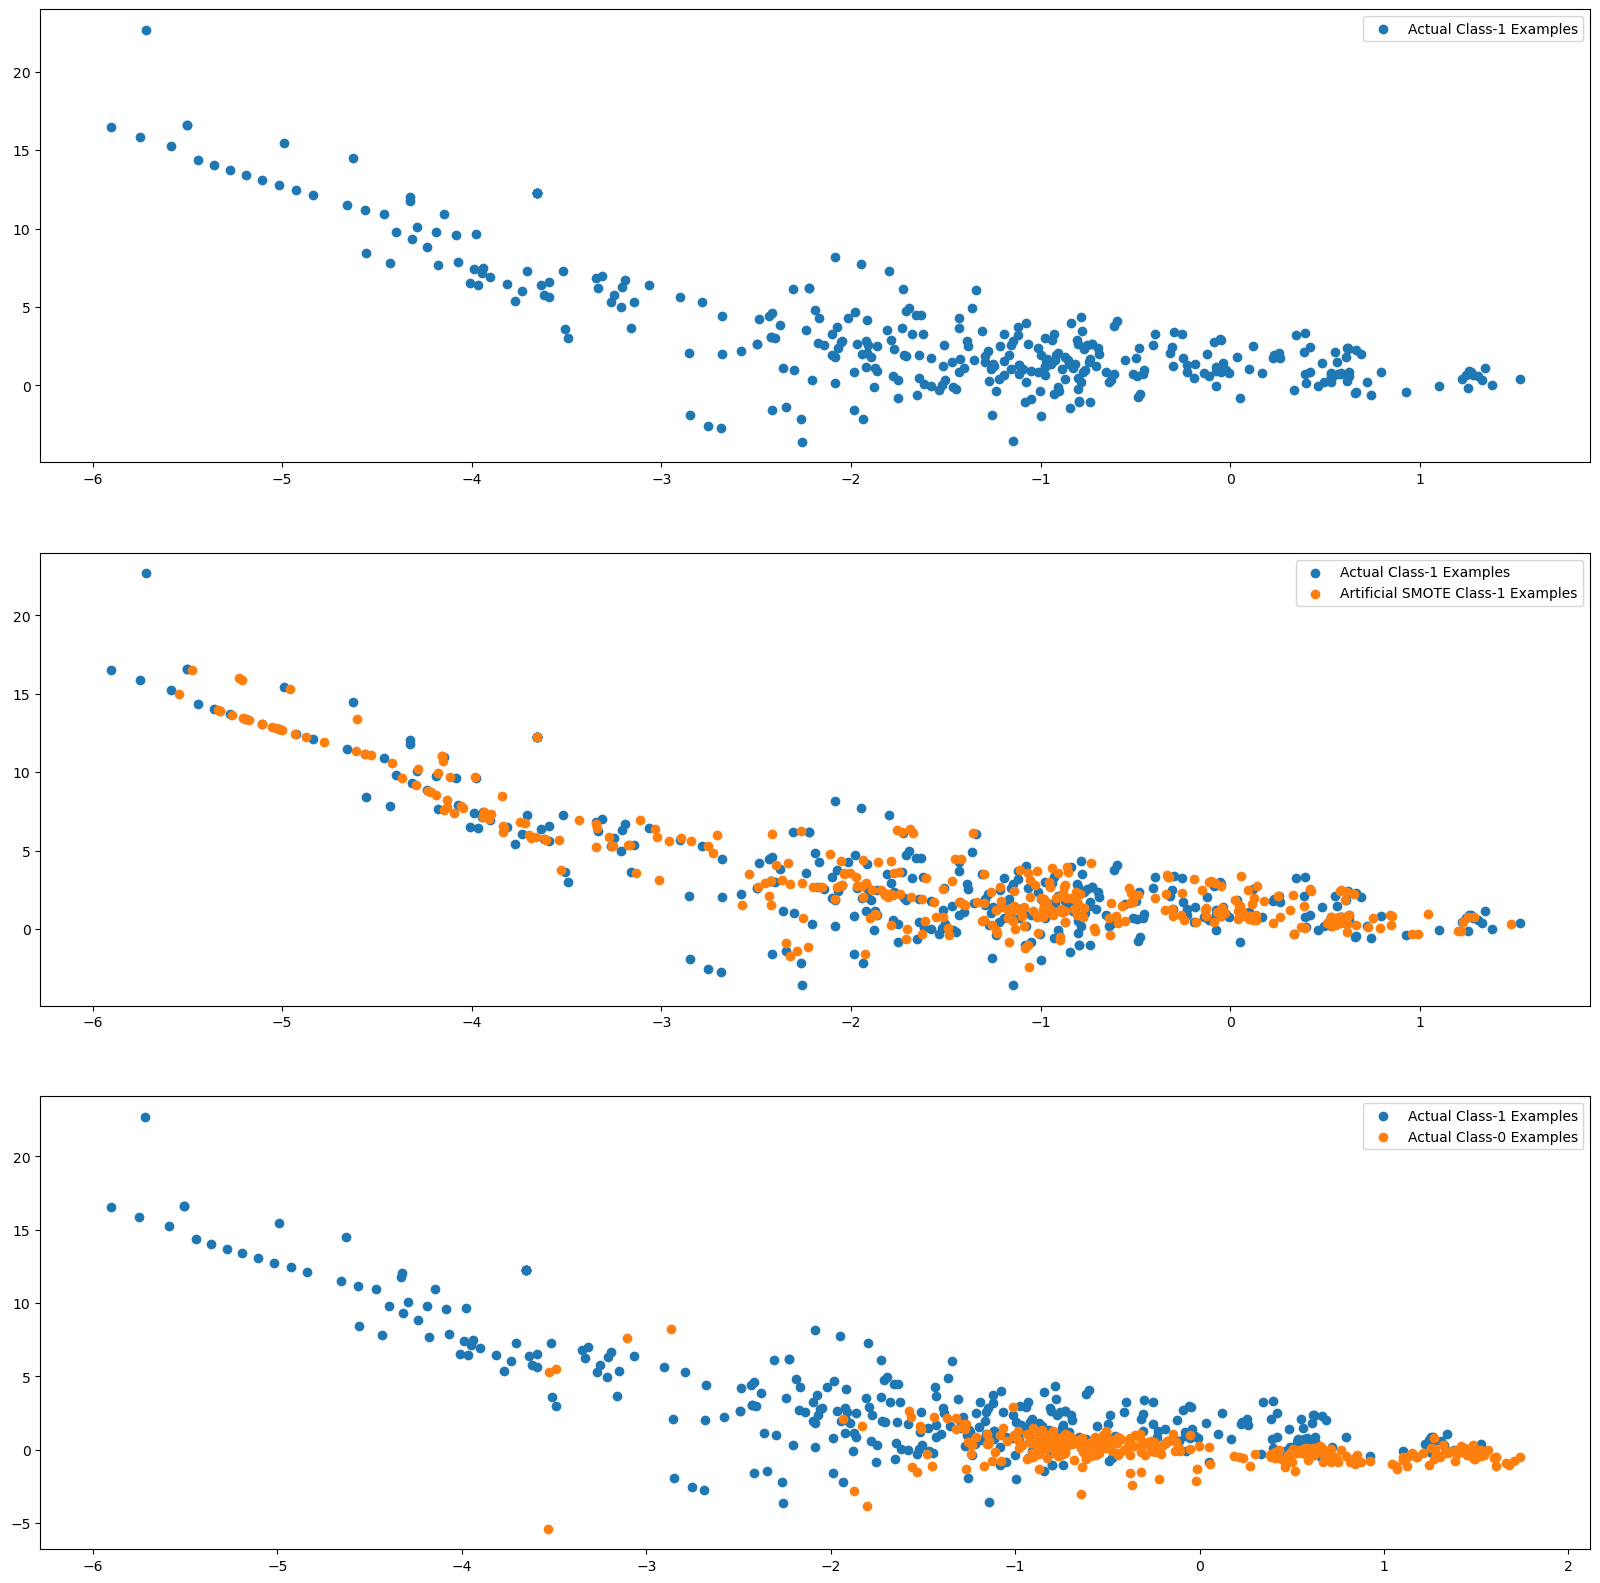

In [121]:
import warnings
warnings.filterwarnings("ignore")


sm = SMOTE(random_state=None,k_neighbors=5)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

train_dt=pd.concat([X_train, y_train], axis=1)
train_dt.head()

#X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
#X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

X_train_1 = train_dt[train_dt['Class']==1]
X_train_0 = train_dt[train_dt['Class']==0]



plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1.iloc[:, 0], X_train_1.iloc[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1.iloc[:, 0], X_train_1.iloc[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1.iloc[:, 0], X_train_1.iloc[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0.iloc[:X_train_1.shape[0], 0], X_train_0.iloc[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Logistic Regression Model Building

In [113]:
model = LogisticRegression()
# Creating StratifiedKFold object with 7 splits
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=1)

# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)
# define search
model_cv = RandomizedSearchCV(model, space, n_iter=500, scoring='roc_auc', n_jobs=-1, cv=skf, random_state=1)
# execute search
result = model_cv.fit(X_resampled_smt, y_resampled_smt)
# summarize result
print('Best ROC_AUC Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


Best ROC_AUC Score: 0.9911968004088971
Best Hyperparameters: {'C': 0.01538074135003166, 'penalty': 'l2', 'solver': 'liblinear'}


In [114]:
num_C= 0.01538074135003166
lr_smt = LogisticRegression(C=num_C)

# Fit the model on the train set
lr_smt_model = lr_smt.fit(X_resampled_smt, y_resampled_smt)

In [115]:
# Predictions on the train set
y_train_pred_smt = lr_smt_model.predict(X_resampled_smt)

# Confusion matrix
confusion14 = confusion_matrix(y_resampled_smt, y_train_pred_smt)
print(confusion14)

TP = confusion14[1,1] # true positive 
TN = confusion14[0,0] # true negatives
FP = confusion14[0,1] # false positives
FN = confusion14[1,0] # false negatives

# ROC_AUC
print("ROC_AUC:-",roc_auc_score(y_resampled_smt, y_train_pred_smt))

# f1_score
print("F1 Score:-",f1_score(y_resampled_smt, y_train_pred_smt))

# Accuracy
print("Accuracy:-",accuracy_score(y_resampled_smt, y_train_pred_smt))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


[[194232   4782]
 [ 14906 184108]]
ROC_AUC:- 0.9505361431859066
F1 Score:- 0.9492451740636859
Accuracy:- 0.9505361431859065
Sensitivity:- 0.9251007466811381
Specificity:- 0.9759715396906751


In [116]:
# Prediction on the test set
y_test_pred = lr_smt_model.predict(X_test)


In [117]:
# Confusion matrix
confusion15 = confusion_matrix(y_test, y_test_pred)
print(confusion15)


[[83165  2136]
 [   15   127]]


In [118]:
TP = confusion15[1,1] # true positive 
TN = confusion15[0,0] # true negatives
FP = confusion15[0,1] # false positives
FN = confusion15[1,0] # false negatives

# ROC_AUC
print("ROC_AUC:-",roc_auc_score(y_test, y_test_pred))

# f1_score
print("F1 Score:-",f1_score(y_test, y_test_pred))

# Accuracy
print("Accuracy:-",accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


ROC_AUC:- 0.9346627295454653
F1 Score:- 0.10561330561330562
Accuracy:- 0.9748253221445876
Sensitivity:- 0.8943661971830986
Specificity:- 0.9749592619078322


### Decision Tree Model building

In [122]:
model = DecisionTreeClassifier()
# Creating StratifiedKFold object with 7 splits
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=1)

param = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

# define search
model_cv = RandomizedSearchCV(model, param_distributions=param, scoring='roc_auc', cv=skf, verbose=1)
# execute search
result = model_cv.fit(X_resampled_smt, y_resampled_smt)
# summarize result
print('Best ROC_AUC Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


Fitting 7 folds for each of 8 candidates, totalling 56 fits
Best ROC_AUC Score: 0.998097825713004
Best Hyperparameters: {'min_samples_split': 50, 'min_samples_leaf': 50, 'max_depth': 10}


In [123]:
# Model with optimal hyperparameters
dt_smt_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)


In [124]:
dt_smt_model.fit(X_resampled_smt, y_resampled_smt)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [125]:
# Predictions on the train set
y_train_pred_smt = dt_smt_model.predict(X_resampled_smt)


In [126]:
# Confusion matrix
confusion16 = confusion_matrix(y_resampled_smt, y_train_pred_smt)
print(confusion16)


[[195971   3043]
 [  2333 196681]]


In [127]:
TP = confusion16[1,1] # true positive 
TN = confusion16[0,0] # true negatives
FP = confusion16[0,1] # false positives
FN = confusion16[1,0] # false negatives

# ROC_AUC
print("ROC_AUC:-",roc_auc_score(y_resampled_smt, y_train_pred_smt))

# f1_score
print("F1 Score:-",f1_score(y_resampled_smt, y_train_pred_smt))

# Accuracy
print("Accuracy:-",accuracy_score(y_resampled_smt, y_train_pred_smt))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


ROC_AUC:- 0.986493412523742
F1 Score:- 0.9865174625944856
Accuracy:- 0.986493412523742
Sensitivity:- 0.9882772066286793
Specificity:- 0.9847096184188047


In [128]:
# Prediction on the test set
y_test_pred = dt_smt_model.predict(X_test)


In [129]:
# Confusion matrix
confusion17 = confusion_matrix(y_test, y_test_pred)
print(confusion17)


TP = confusion17[1,1] # true positive 
TN = confusion17[0,0] # true negatives
FP = confusion17[0,1] # false positives
FN = confusion17[1,0] # false negatives

# ROC_AUC
print("ROC_AUC:-",roc_auc_score(y_test, y_test_pred))

# f1_score
print("F1 Score:-",f1_score(y_test, y_test_pred))

# Accuracy
print("Accuracy:-",accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


[[83869  1432]
 [   21   121]]
ROC_AUC:- 0.9176625325628168
F1 Score:- 0.14277286135693215
Accuracy:- 0.9829945109605234
Sensitivity:- 0.852112676056338
Specificity:- 0.9832123890692958


### XGBoost Model Building

In [130]:
model = XGBClassifier()

# Creating StratifiedKFold object with 7 splits
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=1)

xgparams = {
 'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
 'max_depth' : [ 3, 7, 9, 11, 13, 15],
 'max_leaves': range(50, 150, 50),
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'gamma': [ 0.0, 0.2, 0.4, 0.6, 0.8, 1 ],
 'n_estimators': [100,200,300],   
 'colsample_bytree' : [ 0.1, 0.3, 0.5 , 0.7 ]
}


model_cv=RandomizedSearchCV(model, param_distributions=xgparams, scoring='roc_auc', cv=skf, n_jobs = -1, verbose=1)

# execute search
result = model_cv.fit(X_resampled_smt, y_resampled_smt)
# summarize result
print('Best ROC_AUC Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_estimator_)


Fitting 7 folds for each of 10 candidates, totalling 70 fits
Best ROC_AUC Score: 0.9999915162008638
Best Hyperparameters: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.8, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=50,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [131]:
xg_smt_model=XGBClassifier(colsample_bytree=0.3, gamma=0.8, learning_rate=0.15, max_depth=7, max_leaves=50,
              min_child_weight=3, n_estimators=300, n_jobs=None, random_state=None)


In [132]:
xg_smt_model.fit(X_resampled_smt, y_resampled_smt)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.8, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=50,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [133]:
# Predictions on the train set
y_train_pred_smt = xg_smt_model.predict(X_resampled_smt)


In [134]:
# Confusion matrix
confusion18 = confusion_matrix(y_resampled_smt, y_train_pred_smt)
print(confusion18)

TP = confusion18[1,1] # true positive 
TN = confusion18[0,0] # true negatives
FP = confusion18[0,1] # false positives
FN = confusion18[1,0] # false negatives

# ROC_AUC
print("ROC_AUC:-",roc_auc_score(y_resampled_smt, y_train_pred_smt))

# f1_score
print("F1 Score:-",f1_score(y_resampled_smt, y_train_pred_smt))

# Accuracy
print("Accuracy:-",accuracy_score(y_resampled_smt, y_train_pred_smt))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


[[199004     10]
 [     0 199014]]
ROC_AUC:- 0.9999748761393671
F1 Score:- 0.9999748767705596
Accuracy:- 0.9999748761393671
Sensitivity:- 1.0
Specificity:- 0.9999497522787342


In [135]:
# Prediction on the test set
y_test_pred = xg_smt_model.predict(X_test)


In [136]:
# Confusion matrix
confusion19 = confusion_matrix(y_test, y_test_pred)
print(confusion19)

TP = confusion19[1,1] # true positive 
TN = confusion19[0,0] # true negatives
FP = confusion19[0,1] # false positives
FN = confusion19[1,0] # false negatives

# ROC_AUC
print("ROC_AUC:-",roc_auc_score(y_test, y_test_pred))

# f1_score
print("F1 Score:-",f1_score(y_test, y_test_pred))

# Accuracy
print("Accuracy:-",accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


[[85241    60]
 [   24   118]]
ROC_AUC:- 0.9151412619867575
F1 Score:- 0.7374999999999999
Accuracy:- 0.9990168884519505
Sensitivity:- 0.8309859154929577
Specificity:- 0.9992966084805571


## ADASYN

In [139]:
# ADASYN
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=None, n_neighbors=5)
X_resampled_ada, y_resampled_ada = ada.fit_resample(X_train, y_train)


### Print the class distribution after applying ADASYN

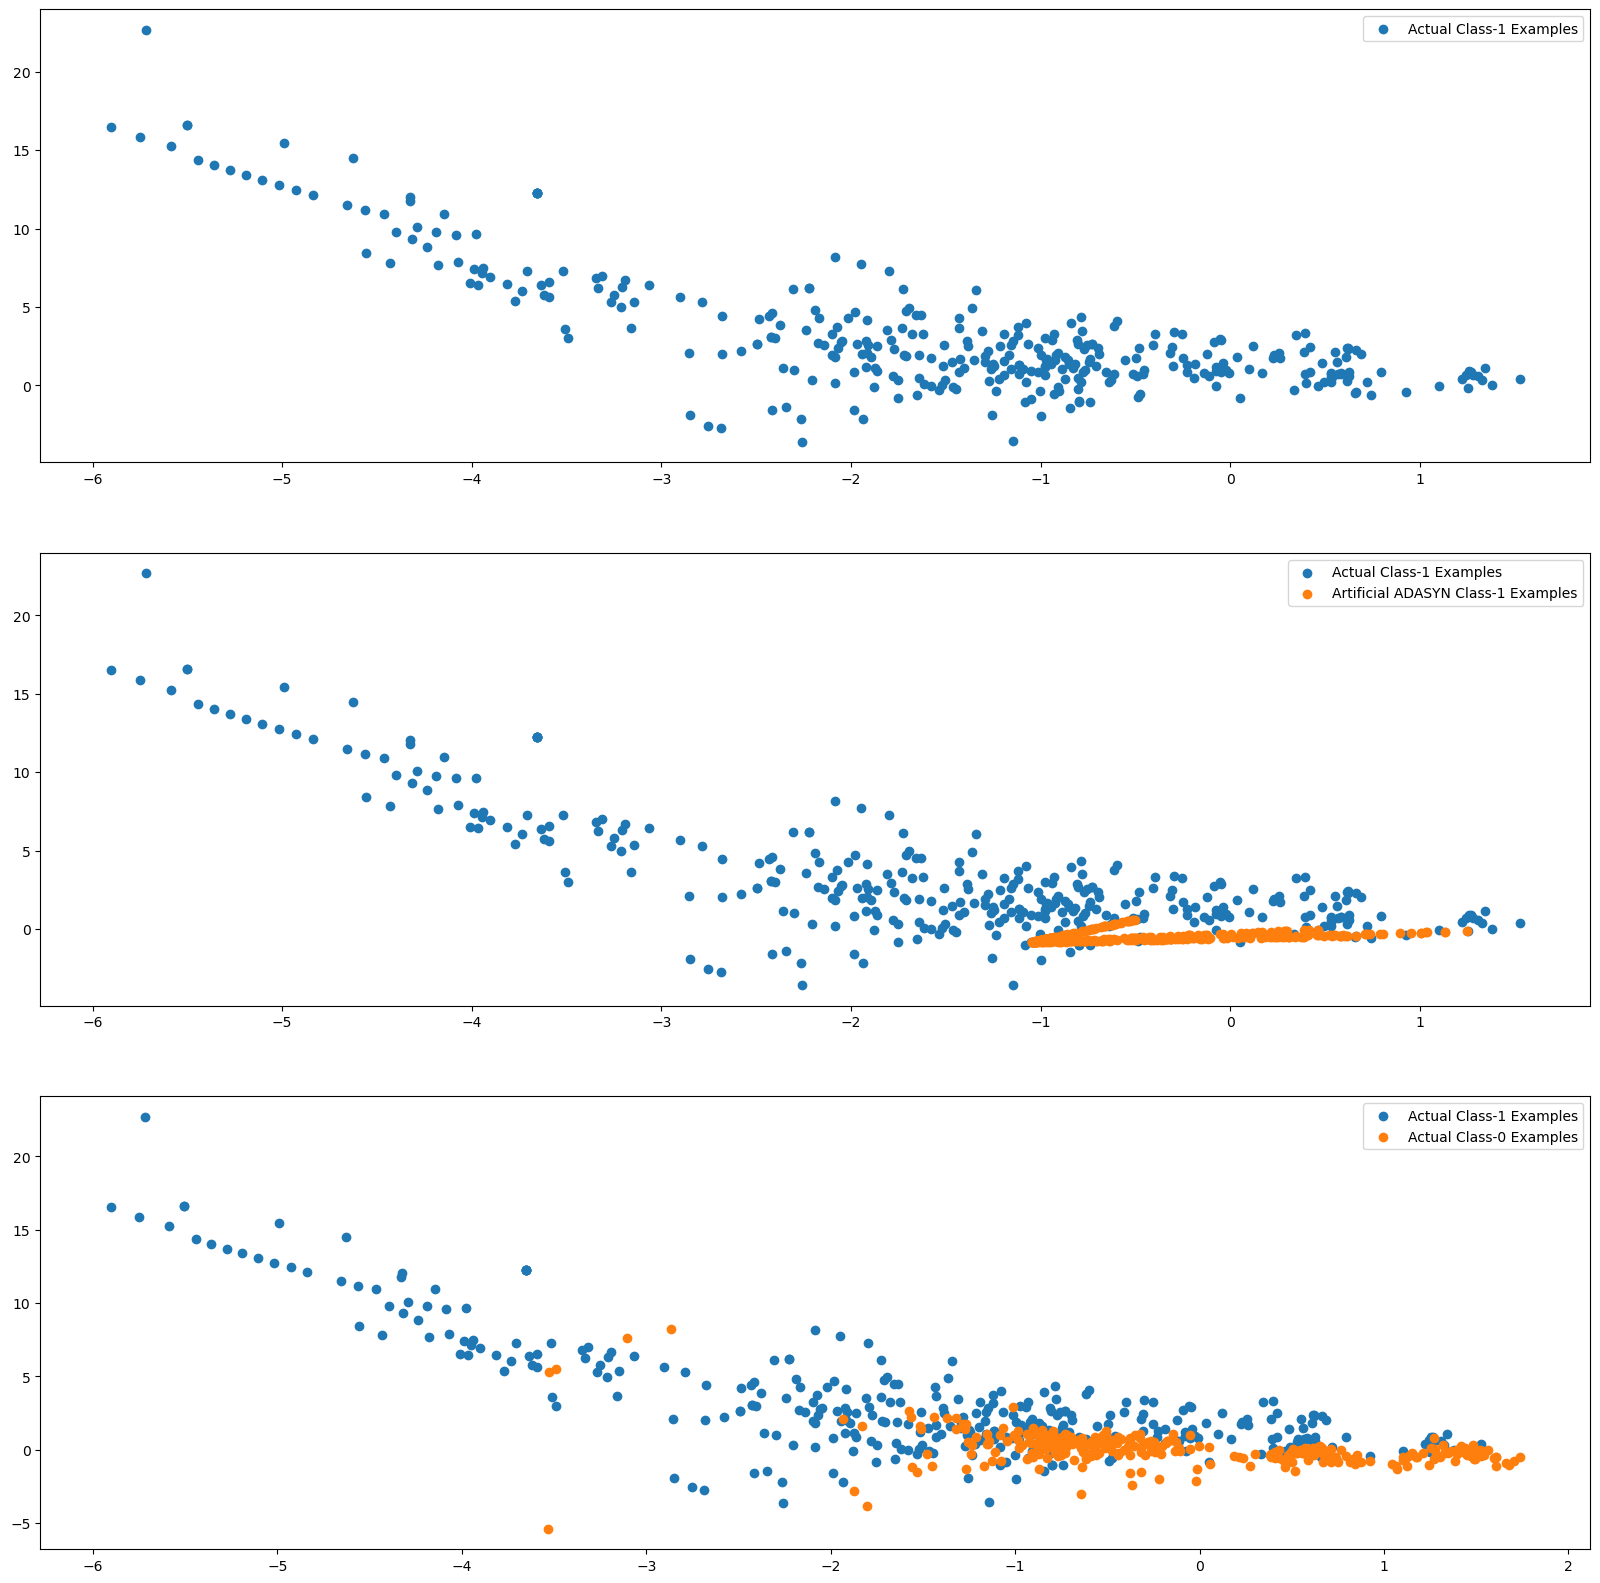

In [137]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=None, n_neighbors=5)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

train_dt=pd.concat([X_train, y_train], axis=1)
train_dt.head()

#X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
#X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

X_train_1 = train_dt[train_dt['Class']==1]
X_train_0 = train_dt[train_dt['Class']==0]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1.iloc[:, 0], X_train_1.iloc[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1.iloc[:, 0], X_train_1.iloc[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1.iloc[:, 0], X_train_1.iloc[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0.iloc[:X_train_1.shape[0], 0], X_train_0.iloc[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Logistic Regression Model Building

In [140]:
model = LogisticRegression()
# Creating StratifiedKFold object with 7 splits
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=1)

# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)
# define search
model_cv = RandomizedSearchCV(model, space, n_iter=500, scoring='roc_auc', n_jobs=-1, cv=skf, random_state=1)
# execute search
result = model_cv.fit(X_resampled_ada, y_resampled_ada)
# summarize result
print('Best ROC_AUC Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


Best ROC_AUC Score: 0.9688495464854633
Best Hyperparameters: {'C': 0.04250882813054309, 'penalty': 'l2', 'solver': 'liblinear'}


In [141]:
num_C= 0.04250882813054309
lr_ada = LogisticRegression(C=num_C)

# Fit the model on the train set
lr_ada_model = lr_ada.fit(X_resampled_ada, y_resampled_ada)

In [142]:
# Predictions on the train set
y_train_pred_ada = lr_ada_model.predict(X_resampled_ada)

# Confusion matrix
confusion20 = confusion_matrix(y_resampled_ada, y_train_pred_ada)
print(confusion20)

TP = confusion20[1,1] # true positive 
TN = confusion20[0,0] # true negatives
FP = confusion20[0,1] # false positives
FN = confusion20[1,0] # false negatives

# ROC_AUC
print("ROC_AUC:-",roc_auc_score(y_resampled_ada, y_train_pred_ada))

# f1_score
print("F1 Score:-",f1_score(y_resampled_ada, y_train_pred_ada))

# Accuracy
print("Accuracy:-",accuracy_score(y_resampled_ada, y_train_pred_ada))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


[[181806  17208]
 [ 26654 172370]]
ROC_AUC:- 0.889805087168413
F1 Score:- 0.8871287332540749
Accuracy:- 0.8898044910284948
Sensitivity:- 0.8660764530910845
Specificity:- 0.9135337212457415


In [143]:
# Prediction on the test set
y_test_pred = lr_ada_model.predict(X_test)


In [144]:
# Confusion matrix
confusion21 = confusion_matrix(y_test, y_test_pred)
print(confusion21)


[[77759  7542]
 [    8   134]]


In [145]:
TP = confusion21[1,1] # true positive 
TN = confusion21[0,0] # true negatives
FP = confusion21[0,1] # false positives
FN = confusion21[1,0] # false negatives

# ROC_AUC
print("ROC_AUC:-",roc_auc_score(y_test, y_test_pred))

# f1_score
print("F1 Score:-",f1_score(y_test, y_test_pred))

# Accuracy
print("Accuracy:-",accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


ROC_AUC:- 0.9276228289185058
F1 Score:- 0.03427986697365055
Accuracy:- 0.9116369977645916
Sensitivity:- 0.9436619718309859
Specificity:- 0.9115836860060257


### Decision Tree Model Building

In [146]:
model = DecisionTreeClassifier()
# Creating StratifiedKFold object with 7 splits
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=1)

param = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

# define search
model_cv = RandomizedSearchCV(model, param_distributions=param, scoring='roc_auc', cv=skf, verbose=1)
# execute search
result = model_cv.fit(X_resampled_ada, y_resampled_ada)
# summarize result
print('Best ROC_AUC Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


Fitting 7 folds for each of 8 candidates, totalling 56 fits
Best ROC_AUC Score: 0.9932282425068312
Best Hyperparameters: {'min_samples_split': 50, 'min_samples_leaf': 50, 'max_depth': 10}


In [147]:
# Model with optimal hyperparameters
dt_ada_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)


In [148]:
dt_ada_model.fit(X_resampled_ada, y_resampled_ada)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [149]:
# Predictions on the train set
y_train_pred_ada = dt_ada_model.predict(X_resampled_ada)


In [150]:
# Confusion matrix
confusion21 = confusion_matrix(y_resampled_ada, y_train_pred_ada)
print(confusion21)


TP = confusion21[1,1] # true positive 
TN = confusion21[0,0] # true negatives
FP = confusion21[0,1] # false positives
FN = confusion21[1,0] # false negatives

# ROC_AUC
print("ROC_AUC:-",roc_auc_score(y_resampled_ada, y_train_pred_ada))

# f1_score
print("F1 Score:-",f1_score(y_resampled_ada, y_train_pred_ada))

# Accuracy
print("Accuracy:-",accuracy_score(y_resampled_ada, y_train_pred_ada))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


[[192990   6024]
 [  1281 197743]]
ROC_AUC:- 0.9816471815151115
F1 Score:- 0.9818640436355331
Accuracy:- 0.9816474808937841
Sensitivity:- 0.9935635903207654
Specificity:- 0.9697307727094576


In [151]:
# Prediction on the test set
y_test_pred = dt_ada_model.predict(X_test)


In [152]:
# Confusion matrix
confusion22 = confusion_matrix(y_test, y_test_pred)
print(confusion22)


TP = confusion22[1,1] # true positive 
TN = confusion22[0,0] # true negatives
FP = confusion22[0,1] # false positives
FN = confusion22[1,0] # false negatives

# ROC_AUC
print("ROC_AUC:-",roc_auc_score(y_test, y_test_pred))

# f1_score
print("F1 Score:-",f1_score(y_test, y_test_pred))

# Accuracy
print("Accuracy:-",accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


[[82562  2739]
 [   27   115]]
ROC_AUC:- 0.8888746660335043
F1 Score:- 0.07676902536715623
Accuracy:- 0.967627541167796
Sensitivity:- 0.8098591549295775
Specificity:- 0.967890177137431


### XGBoost Model Building

In [153]:
model = XGBClassifier()

# Creating StratifiedKFold object with 7 splits
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=1)

xgparams = {
 'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
 'max_depth' : [ 3, 7, 9, 11, 13, 15],
 'max_leaves': range(50, 150, 50),
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'gamma': [ 0.0, 0.2, 0.4, 0.6, 0.8, 1 ],
 'n_estimators': [100,200,300],   
 'colsample_bytree' : [ 0.1, 0.3, 0.5 , 0.7 ]
}


model_cv=RandomizedSearchCV(model, param_distributions=xgparams, scoring='roc_auc', cv=skf, n_jobs = -1, verbose=1)

# execute search
result = model_cv.fit(X_resampled_ada, y_resampled_ada)
# summarize result
print('Best ROC_AUC Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_estimator_)


Fitting 7 folds for each of 10 candidates, totalling 70 fits
Best ROC_AUC Score: 0.9999857001697238
Best Hyperparameters: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=50,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [154]:
xg_ada_model=XGBClassifier(colsample_bytree=0.5, gamma=1, learning_rate=0.2, max_depth=15, max_leaves=50,
              min_child_weight=1, n_estimators=100, n_jobs=None, random_state=None)


In [155]:
xg_ada_model.fit(X_resampled_ada, y_resampled_ada)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=50,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [156]:
# Predictions on the train set
y_train_pred_ada = xg_ada_model.predict(X_resampled_ada)


In [157]:
# Confusion matrix
confusion23 = confusion_matrix(y_resampled_ada, y_train_pred_ada)
print(confusion23)

TP = confusion23[1,1] # true positive 
TN = confusion23[0,0] # true negatives
FP = confusion23[0,1] # false positives
FN = confusion23[1,0] # false negatives

# ROC_AUC
print("ROC_AUC:-",roc_auc_score(y_resampled_ada, y_train_pred_ada))

# f1_score
print("F1 Score:-",f1_score(y_resampled_ada, y_train_pred_ada))

# Accuracy
print("Accuracy:-",accuracy_score(y_resampled_ada, y_train_pred_ada))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


[[198996     18]
 [     0 199024]]
ROC_AUC:- 0.9999547770508607
F1 Score:- 0.9999547813679138
Accuracy:- 0.9999547781870073
Sensitivity:- 1.0
Specificity:- 0.9999095541017214


In [158]:
# Prediction on the test set
y_test_pred = xg_ada_model.predict(X_test)


In [159]:
# Confusion matrix
confusion24 = confusion_matrix(y_test, y_test_pred)
print(confusion24)

TP = confusion24[1,1] # true positive 
TN = confusion24[0,0] # true negatives
FP = confusion24[0,1] # false positives
FN = confusion24[1,0] # false negatives

# ROC_AUC
print("ROC_AUC:-",roc_auc_score(y_test, y_test_pred))

# f1_score
print("F1 Score:-",f1_score(y_test, y_test_pred))

# Accuracy
print("Accuracy:-",accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


[[85233    68]
 [   26   116]]
ROC_AUC:- 0.9080521156976677
F1 Score:- 0.7116564417177915
Accuracy:- 0.9988998513628969
Sensitivity:- 0.8169014084507042
Specificity:- 0.9992028229446314


### All applied balancing techniques Models summary

#### Preferred Metric for data is ROC_AUC Score and after seeing ROC_AUC Score of all models with different class balancing techniques, we will prefer SMOTE with XGBoost is best for this data.

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [167]:
# perform the best oversampling method on X_train & y_train
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=None, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)

#initialise the model with optimum hyperparameters
clf=XGBClassifier(colsample_bytree=0.3, gamma=0.8, learning_rate=0.15, max_depth=7, max_leaves=50,
              min_child_weight=3, n_estimators=300, n_jobs=None, random_state=None)   
    
clf.fit(X_resampled_smt, y_resampled_smt ) # fit on the balanced dataset

# Predictions on the train set
y_train_pred_smt = xg_smt_model.predict(X_resampled_smt)

    #print the evaluation score on the X_test by choosing the best evaluation metric
y_test_pred = clf.predict(X_test)
  
confusionfinal = confusion_matrix(y_test, y_test_pred)
print(confusionfinal)

TP = confusionfinal[1,1] # true positive 
TN = confusionfinal[0,0] # true negatives
FP = confusionfinal[0,1] # false positives
FN = confusionfinal[1,0] # false negatives

# ROC_AUC
print("ROC_AUC:-",roc_auc_score(y_test, y_test_pred))


[[85245    56]
 [   24   118]]
ROC_AUC:- 0.9151647083707388


### Print the important features of the best model to understand the dataset

Top var = 17
2nd Top var = 14
3rd Top var = 12


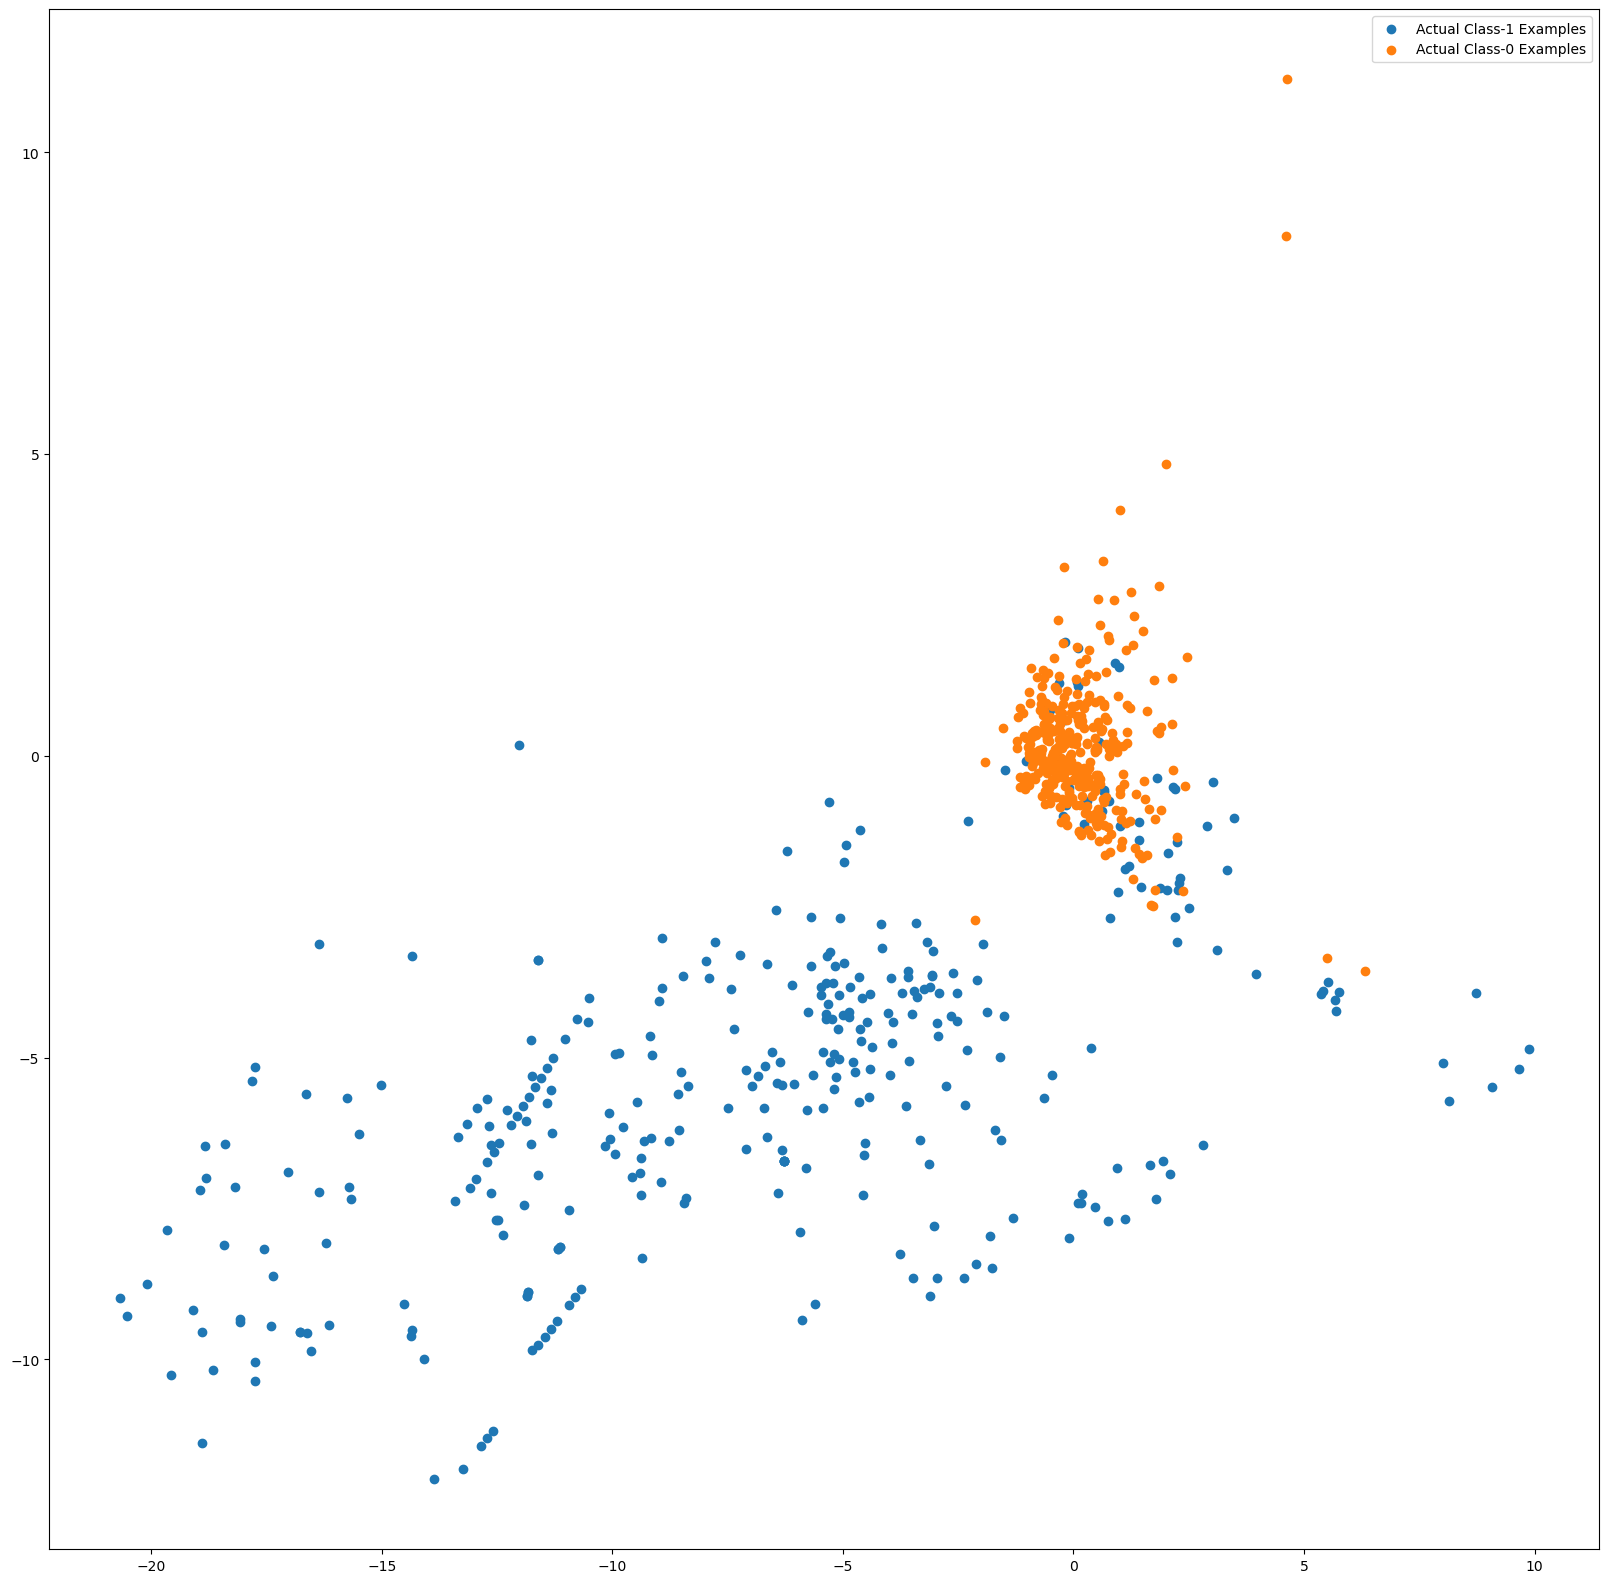

In [161]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

train_dt=pd.concat([X_train, y_train], axis=1)
train_dt.head()

#X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
#X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

X_train_1 = train_dt[train_dt['Class']==1]
X_train_0 = train_dt[train_dt['Class']==0]

#np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1.iloc[:, top_var_index], X_train_1.iloc[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0.iloc[:X_train_1.shape[0], top_var_index], X_train_0.iloc[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Print the FPR,TPR & select the best threshold from the roc curve

In [175]:
from sklearn.metrics import roc_curve
print('Train auc =', roc_auc_score(y_resampled_smt, y_train_pred_smt))
fpr, tpr, thresholds = roc_curve(y_resampled_smt, y_train_pred_smt, pos_label=2)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9999748761393671
2
